In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import glob
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
regions_selected = [
    'Brazil','Portugal','Qatar','Mexico',
    'Chile','France','Spain','Germany',
    'Russia', 'Israel',
    'India','Egypt',
    'UK','USA','South Africa','Australia',
    'HK(region)','CHN','Japan'
    ]

# try to be better
regions_selected = [
    'Brazil','Portugal','Mexico','Qatar',
    
    'Egypt','India',
    
    'Chile','France','Spain','Germany',
    'Russia', 'Israel',
    
    'UK','USA','South Africa','Australia',
    'HK(region)','CHN','Japan'
    
    ]

In [3]:
def fix_region(df):
    regions = list(df.index)
    regions = [i.replace('United States','USA') for i in regions]
    regions = [i.replace('United Kingdom','UK') for i in regions]
    regions = [i.replace('China','CHN') for i in regions]
    regions = [i.replace('South_africa','South Africa') for i in regions]
    regions = [i.replace('Spain','Spanish') for i in regions]
    regions = [i.replace('HK','HK(region)') for i in regions]
    regions = [i.replace('HK(region)(region)','HK(region)') for i in regions]
    regions = [i.replace('Hong Kong SAR, CHN','HK(region)') for i in regions]
    regions = [i.replace('Hong Kong','HK(region)') for i in regions]
    regions = [i.replace('Spanish','Spain') for i in regions]
    regions = [i.replace('Russian Federation','Russia') for i in regions]
    regions = [i.replace('Russian','Russia') for i in regions]
    regions = [i.replace('Egypt, Arab Rep.','Egypt') for i in regions]
    
    df.index = regions
    df.columns = regions
    df = df.loc[regions_selected,regions_selected]
    
    # scaled lower triangle of matrix
    df_lower = np.array(df)[np.tril_indices(19, k=-1)]
    df_lower_scaled = preprocessing.scale(df_lower)
    # transform array into the original matrix
    dissim_scaled = pd.DataFrame(index=df.index,columns=df.columns)
    count = 0
    for x,y in zip(np.tril_indices(19, k = -1)[0],np.tril_indices(19, k = -1)[1]):
        dissim_scaled.iloc[x,y] = df_lower_scaled[count]
        count = count + 1
    count = 0    
    for y,x in zip(np.tril_indices(19, k = -1)[0],np.tril_indices(19, k = -1)[1]):
        dissim_scaled.iloc[x,y] = df_lower_scaled[count]
        count = count + 1
    dissim_scaled = dissim_scaled.fillna(-3.1)
    print(dissim_scaled.max().max(),dissim_scaled.min().min())
    
    return(dissim_scaled)

# Model

## Full feature

2.402217915228237 -3.1


<AxesSubplot:>

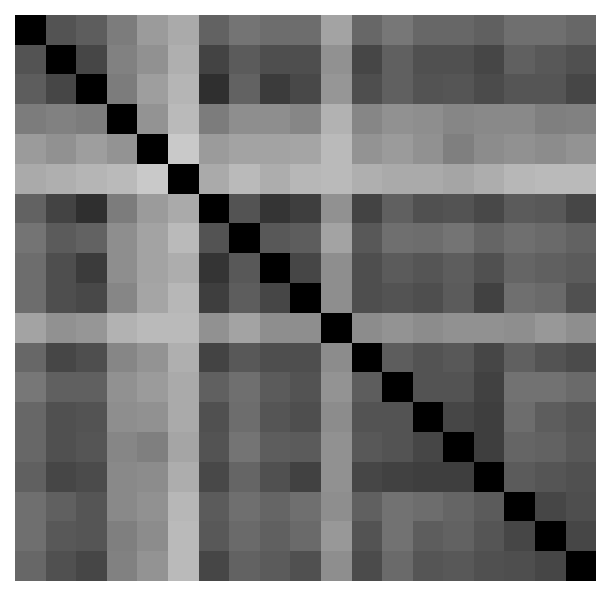

In [4]:
raw_data = pd.read_csv('output_data/models_rdm/full_feature/raw33d_dissim_dist.csv', 
                 index_col=0, encoding = "UTF-8")
raw_data = fix_region(raw_data)

mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(raw_data,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Dimensional

2.0904801214604083 -3.1


<AxesSubplot:>

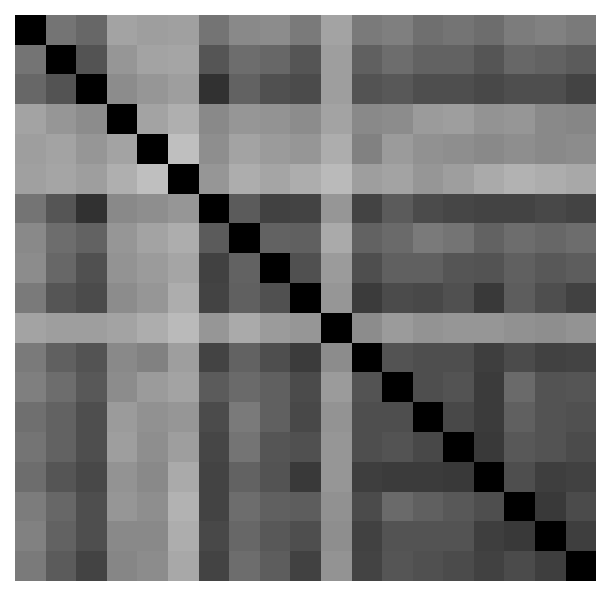

In [5]:
favee = pd.read_csv('D:/Jupyter_notebook/SR_final/Study4/Regression/33d/output_data/dimension/favee_dissim_dist.csv', 
                 index_col=0, encoding = "UTF-8")
favee = fix_region(favee)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(favee,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Categorical

2.3571250680157325 -3.1


<AxesSubplot:>

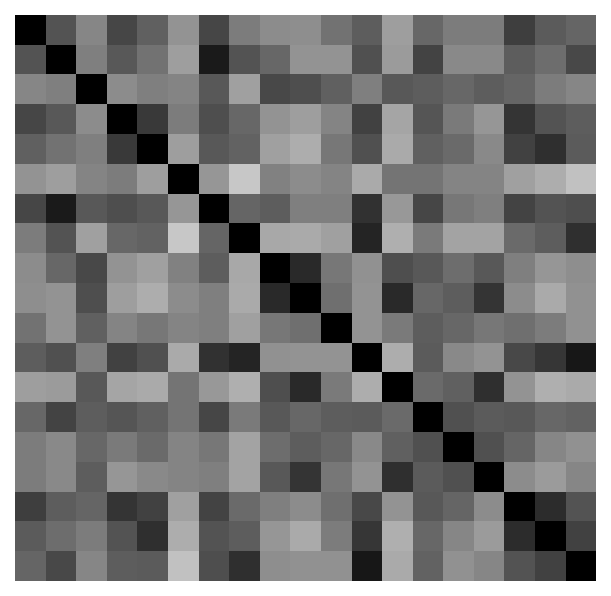

In [6]:
hpp = pd.read_csv('D:/Jupyter_notebook/SR_final/Study4/Regression/33d/output_data/category/hostile_dissim_dist.csv', 
                 index_col=0, encoding = "UTF-8")
hpp = fix_region(hpp)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(hpp,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

# Predictor rdms

## Geography

2.8093040411745207 -3.1


<AxesSubplot:>

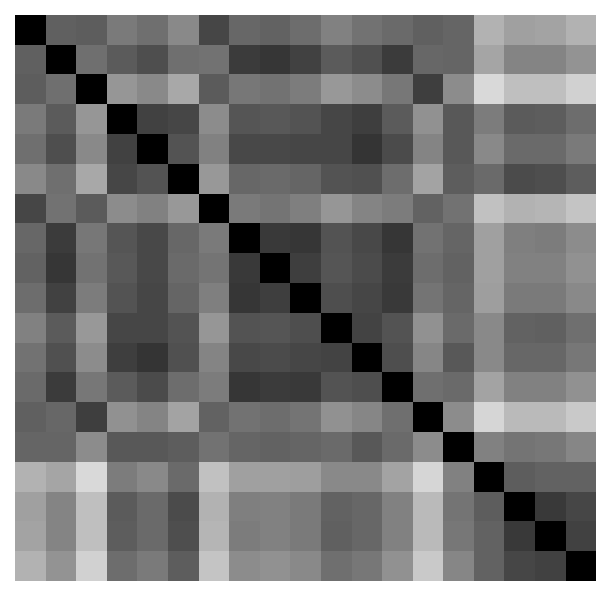

In [7]:
coordination = pd.read_csv(
'../Cultural_RDM/rdm/Coordinate_dist.csv', 
                 index_col=0, encoding = "UTF-8")
coordination = fix_region(coordination)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(coordination,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Gene

2.496290309861138 -3.1


<AxesSubplot:>

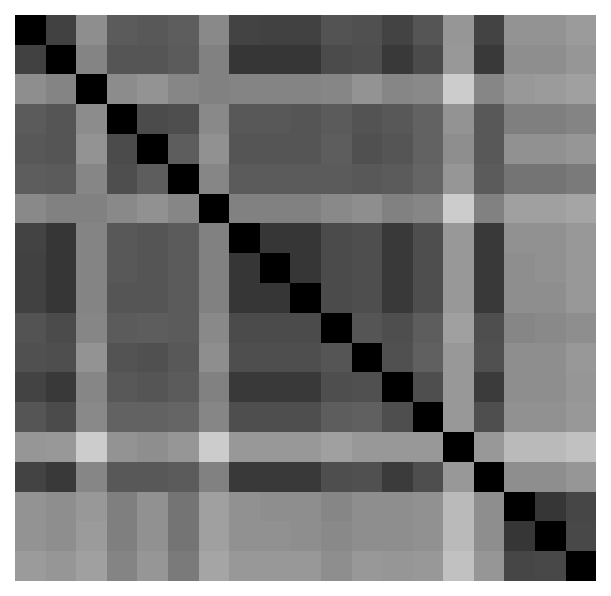

In [8]:
gene = pd.read_csv(
'../Cultural_RDM/rdm/new_gendist_weighted_dist.csv', 
                 index_col=0, encoding = "UTF-8")
gene = fix_region(gene)

mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(gene,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Hofsted6D

2.0228731168732614 -3.1


<AxesSubplot:>

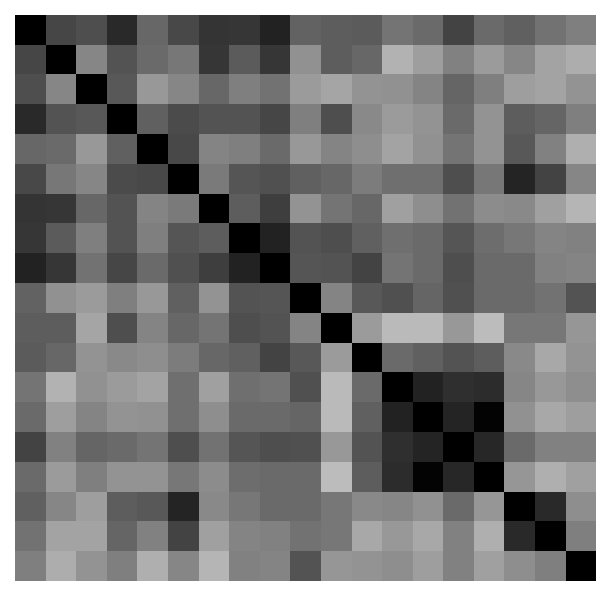

In [9]:
Hofstede_6D = pd.read_csv(
'../Cultural_RDM/rdm/Hofstede_6D_rdm.csv', 
                 index_col=0, encoding = "UTF-8")
Hofstede_6D = fix_region(Hofstede_6D)

mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(Hofstede_6D,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Disease

2.323596132289186 -3.1


<AxesSubplot:>

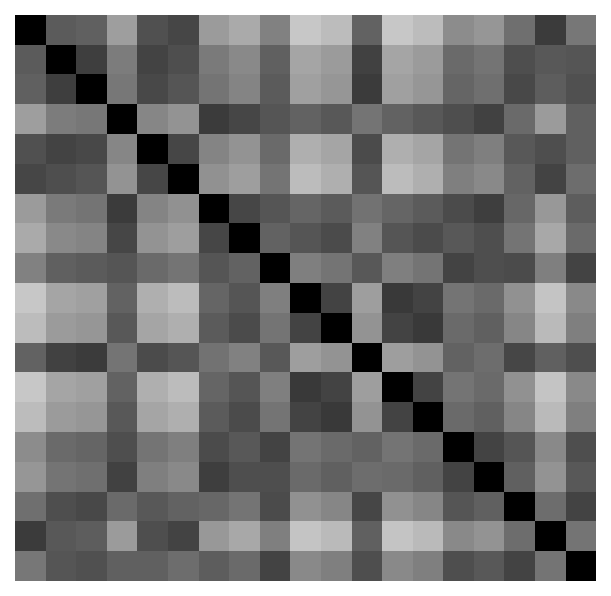

In [10]:
disease = pd.read_csv(
'../Cultural_RDM/rdm/disease_dist.csv', 
                 index_col=0, encoding = "UTF-8")
disease = fix_region(disease)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(disease,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Subsistence

3.246359300396131 -3.1


<AxesSubplot:>

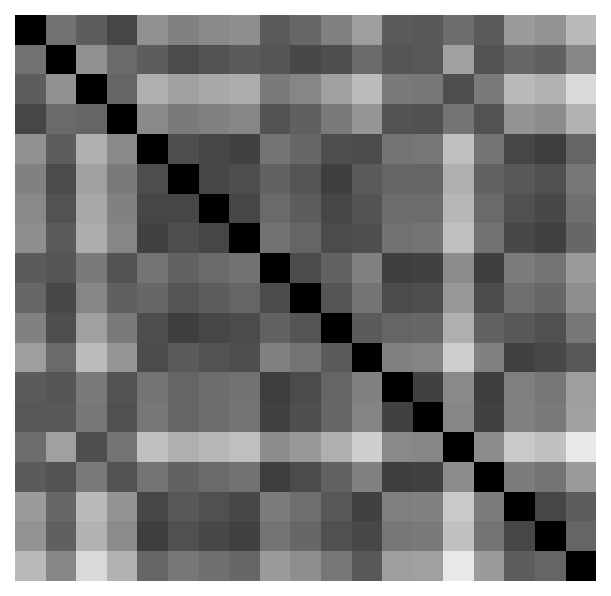

In [11]:
subsistence = pd.read_csv(
'../Cultural_RDM/rdm/subsistence_dist.csv', 
                 index_col=0, encoding = "UTF-8")
subsistence = fix_region(subsistence)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(subsistence,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Political

2.8690923186777226 -3.1


<AxesSubplot:>

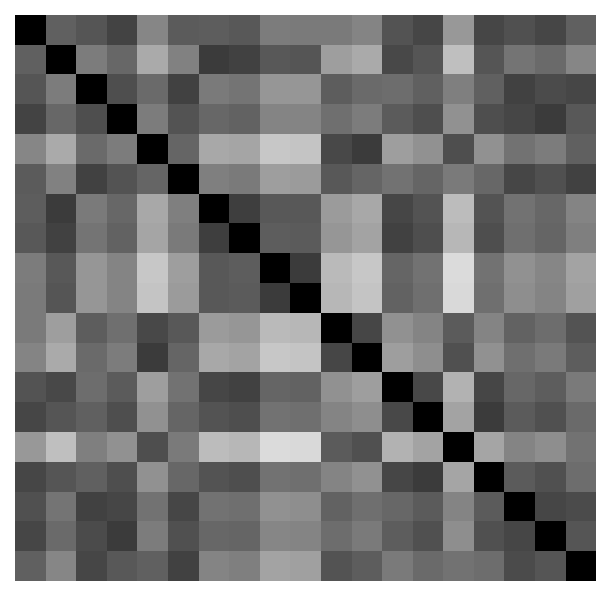

In [12]:
political = pd.read_csv(
'../Cultural_RDM/rdm/political_idealogy_rdm_range.csv', 
                 index_col=0, encoding = "UTF-8")
political = fix_region(political)

mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(political,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Demographics

2.554143281301677 -3.1


<AxesSubplot:>

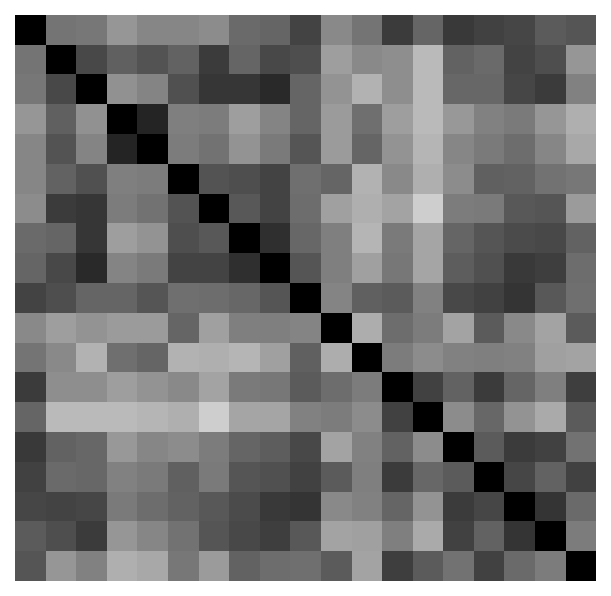

In [14]:
demographic = pd.read_csv(
'../DataClean_FAVEE_HPP/output_data/rdm/demographics_rdm.csv', 
                 index_col=0, encoding = "UTF-8")
demographic = fix_region(demographic)

mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(demographic,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Language

0.4352145297833697 -3.1


<AxesSubplot:>

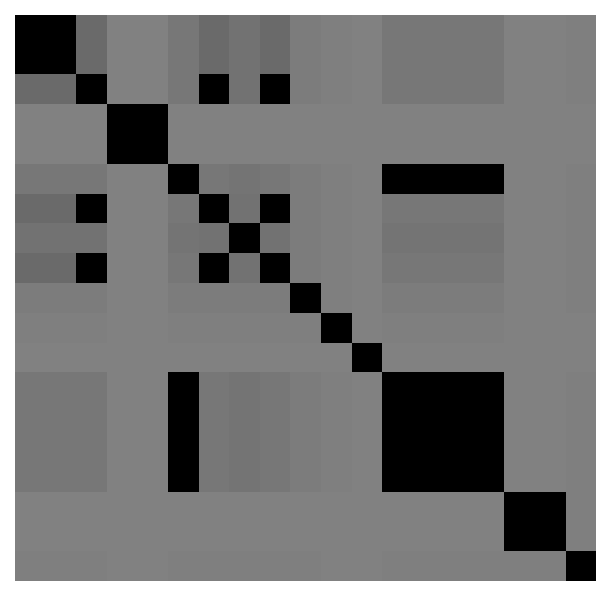

In [15]:
language = pd.read_csv(
'../Cultural_RDM/rdm/Lexical_dist.csv', 
                 index_col=0, encoding = "UTF-8")
language = fix_region(language)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(language,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

0.5316007354202564 -3.7820817059390692


<AxesSubplot:>

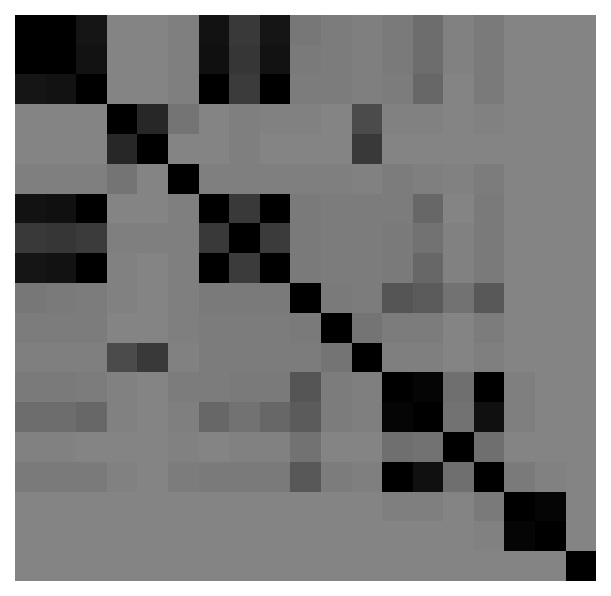

In [16]:
language = pd.read_csv(
'../Cultural_RDM/rdm/linguistic_dist.csv', 
                 index_col=0, encoding = "UTF-8")
language = fix_region(language)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(language,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Personality

3.8457507404442843 -3.1


<AxesSubplot:>

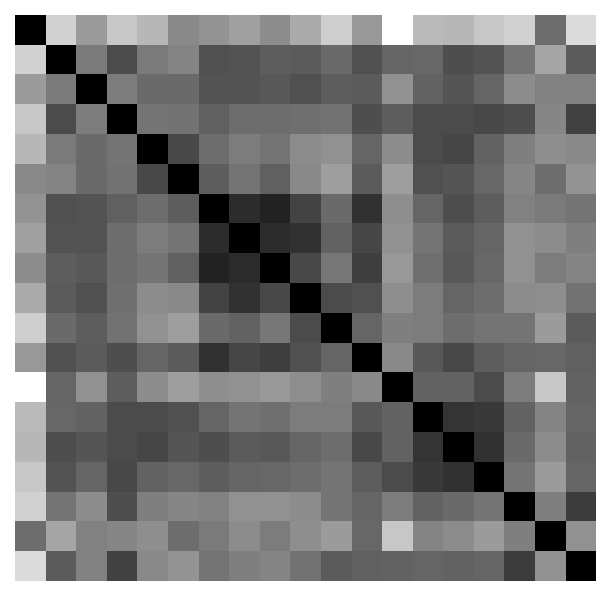

In [17]:
personality = pd.read_csv(
'../Cultural_RDM/rdm/personality_all_dist.csv', 
                 index_col=0, encoding = "UTF-8")
personality = fix_region(personality)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(personality,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Climates

3.41862437690255 -3.1


<AxesSubplot:>

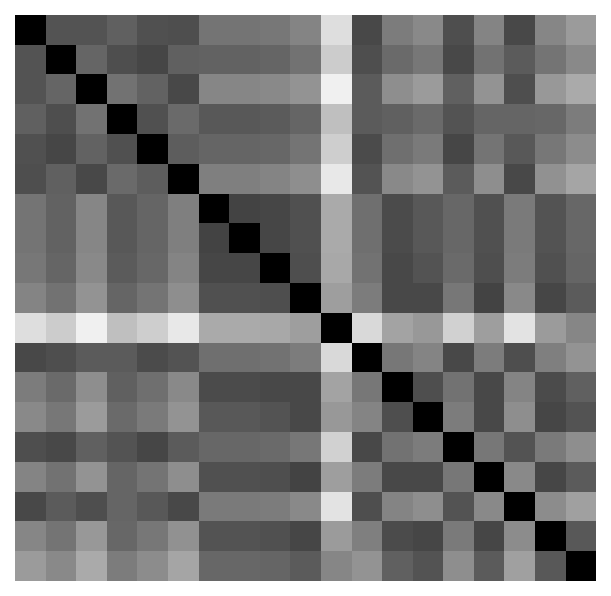

In [18]:
climates = pd.read_csv(
'../Cultural_RDM/rdm/Climatic_demands_dist.csv', 
                 index_col=0, encoding = "UTF-8")
climates = fix_region(climates)
mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(climates,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Modernization

2.917145700058969 -3.1


<AxesSubplot:>

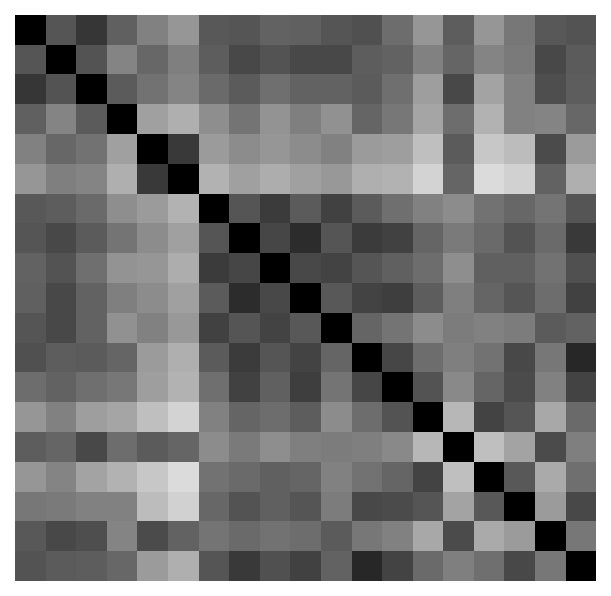

In [19]:
modern = pd.read_csv(
'../Cultural_RDM/rdm/modern_dist.csv', 
                 index_col=0, encoding = "UTF-8")
modern = fix_region(modern)

mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(modern,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )

## Religion

In [20]:
# religion = pd.read_csv(
# '../Cultural_RDM/rdm/reldist_weighted_WCD_form_dist.csv', 
#                  index_col=0, encoding = "UTF-8")
# religion = fix_region(religion)

# mycolor = ['black','grey','white']
# cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
# plt.figure(figsize=(5,5),dpi=150)
# sns.heatmap(religion,cmap = cmaps,
#             xticklabels='',yticklabels='',
#             cbar=False
#             )

1.7511858829415816 -3.1


<AxesSubplot:>

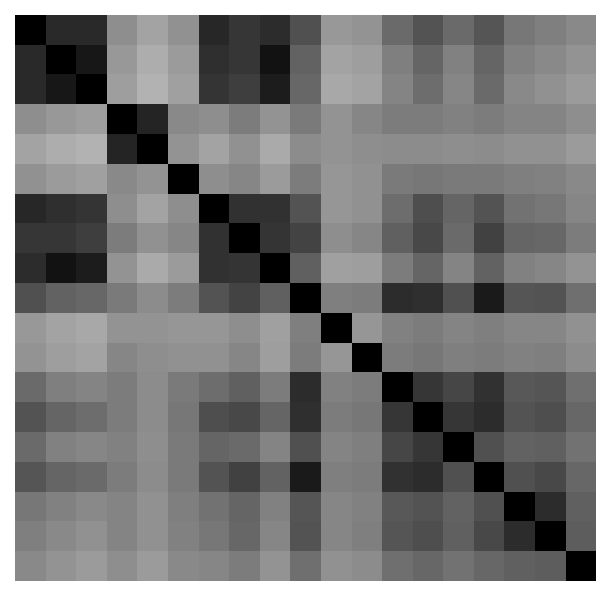

In [21]:
religion = pd.read_csv(
'../Cultural_RDM/rdm/religion_percentage_rdm.csv', 
                 index_col=0, encoding = "UTF-8")
religion = fix_region(religion)

mycolor = ['black','grey','white']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(religion,cmap = cmaps,
            vmax=3.9,vmin=-3.1,
            xticklabels='',yticklabels='',
            cbar=False
            )